In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob
import math
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import Image

import tensorflow as tf
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import keras

#cv
import cv2
import math
from PIL import Image
import math
from scipy import ndimage
import argparse
import imutils
import xml.etree.ElementTree as ET

import random 
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="consolas")
plt.rcParams["font.family"]="consolas" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="consolas", 
        rc={"axes.unicode_minus":False},style='darkgrid')

%cd C:\Users\yukir\Documents\Monicas_workspace\Knee

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 295927745808897184
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5333959293117864826
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2888102443133881505
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5484348733139799434
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
keras 2.3.0-tf
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Knee


In [2]:
set_global_determinism(seed=1337)

In [3]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    classes=['Normal', 'Doubful', 'Mild', 'Moderate', 'Severe']
    print ('*** classes ', classes)
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            file_id=os.path.split(file_names[i])[1]
            error_list.append(file_id)
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(error_list[i], pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    if len(classes)<= 20:
        # create a confusion matrix and a test report        
        y_true= np.array(labels)        
        y_pred=np.array(y_pred)        
        cm = confusion_matrix(y_true, y_pred )
        clr = classification_report(y_true, y_pred, target_names=classes)
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width=length
            fig_height=length
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()    
        print("Classification Report:\n----------------------\n", clr)

In [4]:
# process시각화 및 손실함수

def plot_it(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(20,10))
    ax.plot(history.history['mae_in_months'])
    ax.plot(history.history['val_mae_in_months'])
    plt.title('Model Error')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()
    fig = plt.gcf()
    fig.savefig("../03_model_visualization/"+model_name+".jpg")
    plt.close(fig)

In [5]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

### DATA

In [6]:
train_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask\\train'
test_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask\\test'
val_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask\\val'

In [7]:
filepaths=[]
labels=[]
max_files=2000 # set maximum number of files in a class
data_dir=r'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask'
set_list=['train', 'test', 'val']
class_totals=[0,0,0,0,0]
for s in set_list:
    spath=os.path.join(data_dir,s)
    classes=os.listdir(spath) # list of classes    
    for i, klass in enumerate(classes):        
        classpath=os.path.join(spath, klass)
        filelist=os.listdir(classpath)
        for f in filelist:
            fpath=os.path.join(classpath,f)
            # checks if the file extension is one that can be used with ImageDataGenerator
            index=fpath.rfind('.')
            ext=fpath[index+1:].lower()
            if ext in ['jpg', 'jpeg', 'png']:
                # check to see if the image files are valid images
                try:
                    img = Image.open(fpath)
                    img.verify()
                    if class_totals[i] < max_files:                                              
                        class_totals[i]=class_totals[i] + 1
                        filepaths.append(fpath)
                        labels.append(klass)
                    
                except:
                    print ('file ', fpath, ' is an invalid image file and will not be processed')
                
            else:
                print ('file ', fpath, ' with ', ext, '  will not be processed')
        
# determine the class weight dictionary
for i in range(len(class_totals)):
    print (' class: ', classes[i],  ' totals_samples: ', class_totals[i])
max_samples=np.max(class_totals)
class_weight={}
for i in range (len(class_totals)):
    class_weight[i]=max_samples/class_totals[i]
print ('class weight: ',class_weight)
print(' total files: ',len(filepaths), '  total labels', len(labels))

 class:  0  totals_samples:  2000
 class:  1  totals_samples:  1495
 class:  2  totals_samples:  2000
 class:  3  totals_samples:  1086
 class:  4  totals_samples:  205
class weight:  {0: 1.0, 1: 1.3377926421404682, 2: 1.0, 3: 1.8416206261510129, 4: 9.75609756097561}
 total files:  6786   total labels 6786


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
from keras import Input
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224,224), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=16, target_size=(224, 224), color_mode='rgb')

input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')

Found 5298 images belonging to 5 classes.
Found 1614 images belonging to 5 classes.
Found 1302 images belonging to 5 classes.


### MODEL

In [10]:
from tensorflow.keras.applications import VGG16

def create_model():
    optimizer = Adam()
    
    pre_trained_vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
    #include_top FC 레이어 포함유무 결정
    #feature extraction 파라미터들은 이미지넷으로 학습된 값들을 그대로 사용할 것이기 때문에 trainable의 속성을 False
    pre_trained_vgg.trainable = False
    additional_model = tf.keras.Sequential()
    additional_model.add(pre_trained_vgg)
    additional_model.add(Flatten()) ###여기다가 mask layer붙히면 안되나
    additional_model.add(tf.keras.layers.Dense(4096, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(2048, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(1024, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(5, activation='softmax'))
    

    additional_model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['acc'])

    
    return additional_model

In [11]:
# 모델 실행 옵션 
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5125      
Total params: 127,973,189
Trainable params: 113,258,501
Non-trainable params: 14,714,688
_________________________________

In [12]:
checkpoint_path = "check_point/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [13]:
#모델의 가중치 저장
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
            monitor='loss', 
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)

call_back = [tf.keras.callbacks.EarlyStopping(patience=10, monitor= 'val_loss'),
            tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='loss',
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)]

#새로운 콜백으로 모델 훈련하기
history = model.fit_generator(train_generator, 
            steps_per_epoch=math.ceil(train_generator.n / train_generator.batch_size), 
            epochs=30, 
            validation_data=val_generator,
            verbose = 1, 
            class_weight= class_weight,
            validation_steps=math.ceil(val_generator.n / val_generator.batch_size), 
            callbacks=[call_back],
            shuffle=False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
332/332 [==============================] - ETA: 0s - loss: 2.6545 - acc: 0.3479
Epoch 00001: loss improved from inf to 2.65452, saving model to check_point/cp.ckpt
332/332 [==============================] - 44s 132ms/step - loss: 2.6545 - acc: 0.3479 - val_loss: 1.2317 - val_acc: 0.4480
Epoch 2/30
331/332 [============================>.] - ETA: 0s - loss: 1.6674 - acc: 0.4360  ETA: 12s - loss: 1.7118 - acc - ETA: 11s  - - ETA: 4s - loss: 1.6722 - acc: 0. - ETA: 3s - l - ETA: 1s - loss: 1.6768 - acc: 0.433 - ETA: 1s - loss: 1.6760
Epoch 00002: loss improved from 2.65452 to 1.66731, saving model to check_point/cp.ckpt
332/332 [==============================] - 43s 129ms/step - loss: 1.6673 - acc: 0.4358 - val_loss: 1.1996 - val_acc: 0.4442
Epoch 3/30
331/332 [============================>.] - ETA: 0s - loss: 1.5006 - acc: 0.4735  ETA: 1 - ETA: 9s - loss: 1.5209 - acc: 0.4 - ETA: 8s - loss:  - ETA: 0s -

### RESULT

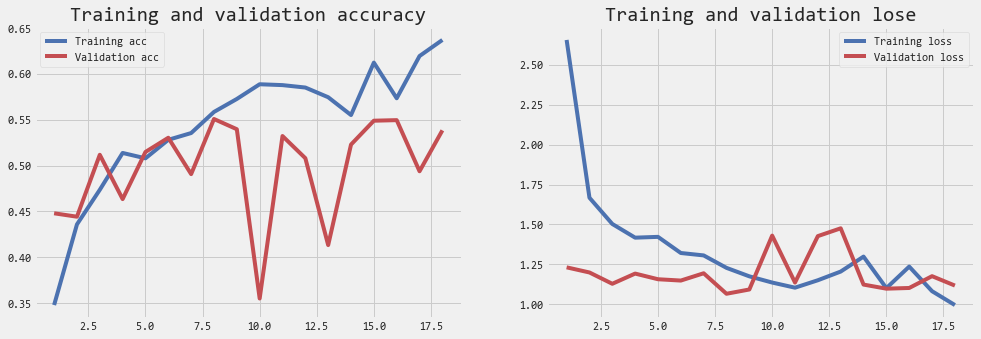

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

In [22]:
#맥에서는 !ls
#저장된 checkpoint확인하기
!dir {checkpoint_dir}

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 5848-7E5C

 C:\Users\yukir\Documents\Monicas_workspace\Knee\check_point ���͸�

2022-01-22  ���� 01:18    <DIR>          .
2022-01-22  ���� 01:18    <DIR>          ..
2022-01-22  ���� 01:18                71 checkpoint
2022-01-22  ���� 01:18             7,593 cp.ckpt.data-00000-of-00002
2022-01-22  ���� 01:18     1,417,960,788 cp.ckpt.data-00001-of-00002
2022-01-22  ���� 01:18             4,030 cp.ckpt.index
               4�� ����       1,417,972,482 ����Ʈ
               2�� ���͸�  205,301,727,232 ����Ʈ ����


In [23]:
#가장 마지막에 만들어진 체크포인트 확인
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'check_point\\cp.ckpt'

In [24]:
#모델 평가
model = create_model()
loss, acc = model.evaluate(test_generator)
print("훈련 안 한 모델의 정확도: {:5.2f}%".format(100*acc))

82/82 [==============================] - 6s 76ms/step - loss: 1.6537 - acc: 0.1874
훈련 안 한 모델의 정확도: 18.74%


In [25]:
# 가중치 로드
model.load_weights(latest)

# # 모델 재평가
loss,acc = model.evaluate(test_generator)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

82/82 [==============================] - 6s 76ms/step - loss: 1.1173 - acc: 0.5292
복원된 모델의 정확도: 52.92%


In [26]:
save_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee'
subject='knees'

*** classes  ['Normal', 'Doubful', 'Mild', 'Moderate', 'Severe']
          Filename                Predicted Class                True Class           Probability   

       0_9003126R.jpg                    3                           0                  0.9385

       0_9005075R.jpg                    2                           0                  0.4567

       0_9007904R.jpg                    4                           0                  0.8268

       0_9009067R.jpg                    3                           0                  0.9455

       0_9011115L.jpg                    2                           0                  0.6980

       0_9011949R.jpg                    1                           0                  0.3550

       0_9016121R.jpg                    3                           0                  0.8836

       0_9016179L.jpg                    3                           0                  0.7364

       0_9016886R.jpg                    2                       

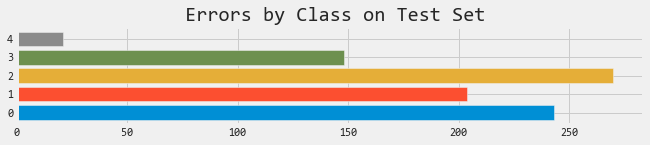

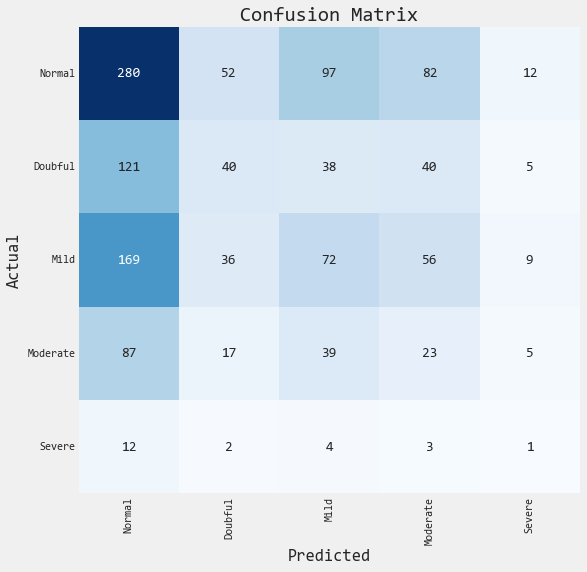

Classification Report:
----------------------
               precision    recall  f1-score   support

      Normal       0.42      0.54      0.47       523
     Doubful       0.27      0.16      0.20       244
        Mild       0.29      0.21      0.24       342
    Moderate       0.11      0.13      0.12       171
      Severe       0.03      0.05      0.04        22

    accuracy                           0.32      1302
   macro avg       0.22      0.22      0.22      1302
weighted avg       0.31      0.32      0.31      1302



In [27]:
preds=model.predict(test_generator, batch_size=16, verbose=0, steps=1302/16)
print_code=10
print_info( test_generator, preds, print_code, save_dir, subject ) 

### SAVE

In [28]:
model.save('[0122]vggadd_full_mask.h5')

model_json = model.to_json()
with open("[0122]vggadd_full_mask.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("[0122]vggadd_full_mask_weight.h5")
print("Saved model to disk")

Saved model to disk
